In [2]:
# using the adventure works database ->"Data\AdvWorksData.xlsx"

In [3]:
!pip install matplotlib numpy pandas scipy seaborn 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
from IPython.display import Image
%matplotlib inline 
sns.set(color_codes=True)


In [5]:
df=pd.read_excel('Data\AdvWorksData.xlsx')

In [6]:
df.head()

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
0,Clothing,Caps,AWC Logo Cap,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,6.9223,5.0136,0.02,1.4038,8.6442,96.9122,-28.125608,14,68.786592
1,Accessories,Locks,Cable Lock,United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,10.3125,15.0000,0.00,0.0000,25.0000,61.8750,28.125000,6,90.000000
2,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.6709,22.7940,0.00,0.0000,37.9900,125.3672,56.984800,8,182.352000
3,Clothing,Gloves,"Full-Finger Gloves, L",United Kingdom,United Kingdom,London,England,Linda Martin,Amy Alberts,1,2012-06-30,15.6709,20.8945,0.05,16.7156,37.9900,250.7344,66.862000,16,317.596400
4,Clothing,Gloves,"Full-Finger Gloves, M",United Kingdom,United Kingdom,Berks,England,Gary Suess,Amy Alberts,1,2012-06-30,15.6709,22.7940,0.00,0.0000,37.9900,109.6963,49.861700,7,159.558000


In [7]:
df.tail()

,productcategory,productsubcategory,product,saleterritory,Country,City,Sate,Customer,Employee,OrderCount,OrderDate,StandardCost,UnitPrice,UnitPriceDiscount,Discount,ListPrice,SaleswithStandard,NetSales,OrderQuantity,Sales
60875,Clothing,Shorts,"Women's Mountain Shorts, L",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,209.4104,126.5416,8,335.952
60876,Clothing,Shorts,"Women's Mountain Shorts, L",Southeast,United States,Miami,Florida,Stephanie Conroy,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,157.0578,94.9062,6,251.964
60877,Clothing,Shorts,"Women's Mountain Shorts, M",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,78.5289,47.4531,3,125.982
60878,Clothing,Shorts,"Women's Mountain Shorts, S",Southeast,United States,Decatur,Georgia,Pamela Cox,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,130.8815,79.0885,5,209.970
60879,Clothing,Shorts,"Women's Mountain Shorts, S",Southeast,United States,Miami,Florida,Stephanie Conroy,Tsvi Reiter,1,2014-05-01,26.1763,41.994,0.0,0.0,69.99,78.5289,47.4531,3,125.982


In [8]:
df.dtypes

productcategory               object
productsubcategory            object
product                       object
saleterritory                 object
Country                       object
City                          object
Sate                          object
Customer                      object
Employee                      object
OrderCount                     int64
OrderDate             datetime64[ns]
StandardCost                 float64
UnitPrice                    float64
UnitPriceDiscount            float64
Discount                     float64
ListPrice                    float64
SaleswithStandard            float64
NetSales                     float64
OrderQuantity                  int64
Sales                        float64
dtype: object

In [9]:
df.columns

Index(['productcategory', 'productsubcategory', 'product', 'saleterritory',
       'Country', 'City', 'Sate', 'Customer', 'Employee', 'OrderCount',
       'OrderDate', 'StandardCost', 'UnitPrice', 'UnitPriceDiscount',
       'Discount', 'ListPrice', 'SaleswithStandard', 'NetSales',
       'OrderQuantity', 'Sales'],
      dtype='object')

In [10]:
df=df[['productcategory','saleterritory','Country','OrderCount','OrderDate','Sales','OrderQuantity','Discount']]

In [11]:
df.head()

,productcategory,saleterritory,Country,OrderCount,OrderDate,Sales,OrderQuantity,Discount
0,Clothing,United Kingdom,United Kingdom,1,2012-06-30,68.786592,14,1.4038
1,Accessories,United Kingdom,United Kingdom,1,2012-06-30,90.000000,6,0.0000
2,Clothing,United Kingdom,United Kingdom,1,2012-06-30,182.352000,8,0.0000
3,Clothing,United Kingdom,United Kingdom,1,2012-06-30,317.596400,16,16.7156
4,Clothing,United Kingdom,United Kingdom,1,2012-06-30,159.558000,7,0.0000


In [12]:
df=df.rename(columns={'productcategory':'Category','saleterritory':'Territory','OrderQuantity':'Quantity','OrderDate':'Date'})

In [13]:
df.head(5)

,Category,Territory,Country,OrderCount,Date,Sales,Quantity,Discount
0,Clothing,United Kingdom,United Kingdom,1,2012-06-30,68.786592,14,1.4038
1,Accessories,United Kingdom,United Kingdom,1,2012-06-30,90.000000,6,0.0000
2,Clothing,United Kingdom,United Kingdom,1,2012-06-30,182.352000,8,0.0000
3,Clothing,United Kingdom,United Kingdom,1,2012-06-30,317.596400,16,16.7156
4,Clothing,United Kingdom,United Kingdom,1,2012-06-30,159.558000,7,0.0000


In [14]:
df.Quantity.unique()

array([14,  6,  8, 16,  7,  2,  1,  3,  4,  5, 10, 13, 12, 18, 15, 11,  9,
       17, 23, 34, 19, 33, 24, 41, 38, 27, 26, 21, 20, 31, 25, 22, 32, 28,
       29, 39, 44, 36, 40, 30, 35], dtype=int64)

In [15]:
df.Sales.unique()

array([  68.786592,   90.      ,  182.352   , ..., 2466.4185  ,
        436.69505 ,   58.383   ])

In [16]:
df.shape

(60880, 8)

In [17]:
df[['Sales','Quantity']].describe()

,Sales,Quantity
count,60880.000000,60880.000000
mean,1322.071356,3.523587
std,2124.171872,3.033950
min,1.374000,1.000000
25%,127.800000,2.000000
50%,461.694000,3.000000
75%,1466.010000,4.000000
max,27893.619000,44.000000


In [18]:
print("Mode of sales is :", df['Sales'].mode())

Mode of sales is : 0    419.4589
Name: Sales, dtype: float64


D:\Code\ETL\ETL-Python-Scripts\etl_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

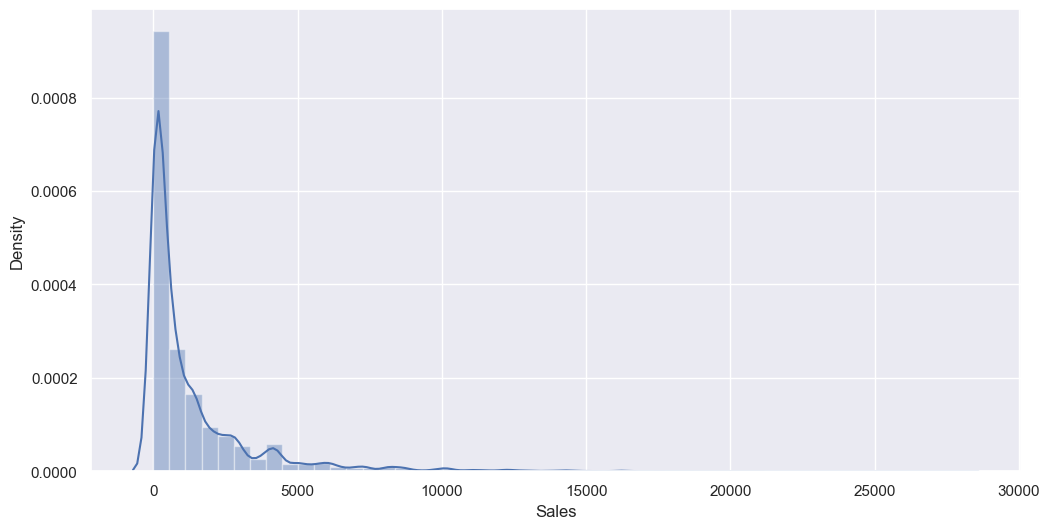

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(df['Sales'],hist=True)

In [20]:
# positive skew unimodal -> one peak

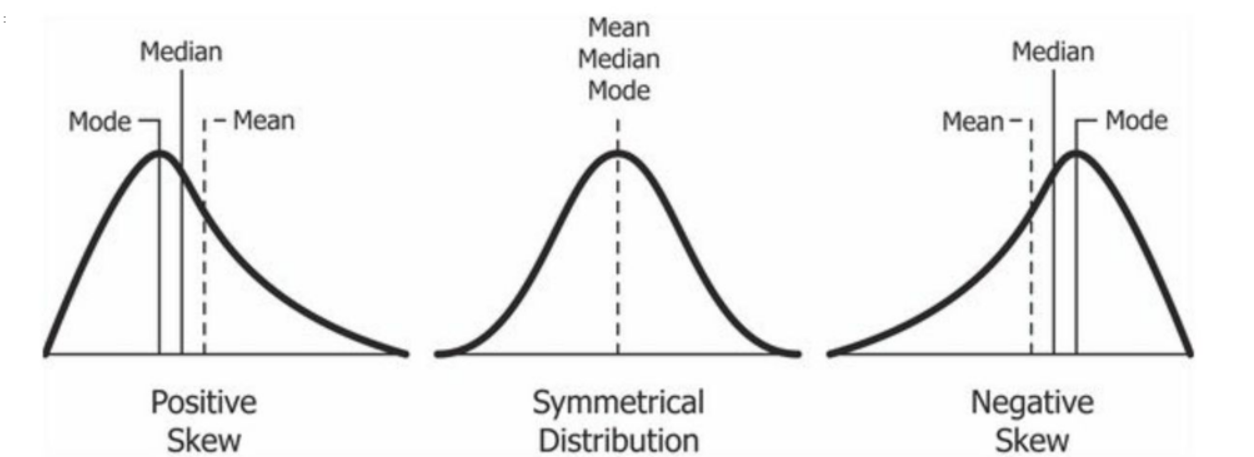

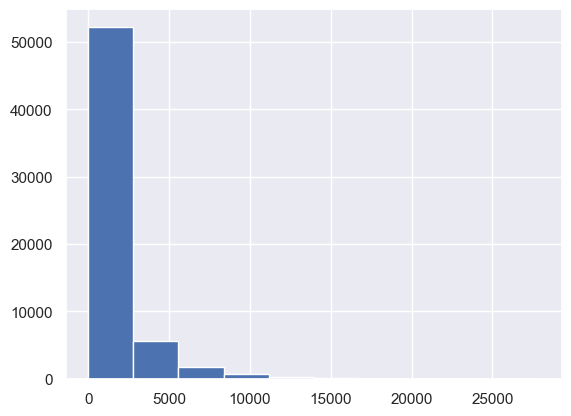

In [21]:
plt.hist(df['Sales'])
plt.show()

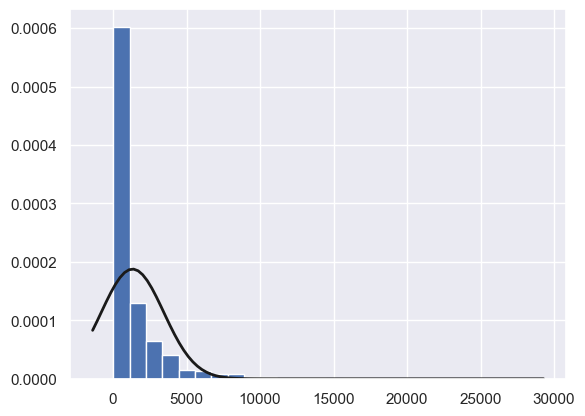

In [22]:
data=df['Sales']
mean,std=norm.fit(data)
plt.hist(data,bins=25,density=True)

xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x,mean,std)
plt.plot(x,p,'k',linewidth=2)
plt.show()

In [23]:
# outliers

D:\Code\ETL\ETL-Python-Scripts\etl_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

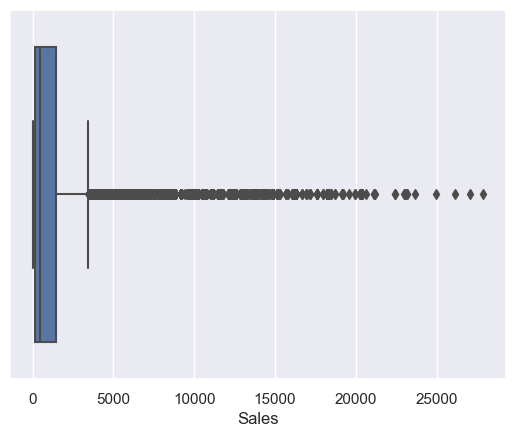

In [24]:
sns.boxplot(df['Sales'])

In [25]:
# remove outliers

In [26]:
Q1=df.Sales.quantile(0.25)
Q3=df.Sales.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

127.8 1466.01 1338.21


In [27]:
# threshold
LTV=Q1-1.5*IQR
UTV=Q3+1.5*IQR
print(LTV,UTV)

-1879.515 3473.325


In [28]:
def removeOutliers(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if(j<LTV or j>UTV):
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [29]:
removeOutliers(df)

,Category,Territory,Country,OrderCount,Date,Sales,Quantity,Discount
0,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,68.786592,3.0,0.0
1,Accessories,United Kingdom,United Kingdom,1.0,2012-06-30,90.000000,6.0,0.0
2,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,182.352000,3.0,0.0
3,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,317.596400,3.0,0.0
4,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,159.558000,7.0,0.0
...,...,...,...,...,...,...,...,...
60875,Clothing,Southeast,United States,1.0,2014-05-01,335.952000,3.0,0.0
60876,Clothing,Southeast,United States,1.0,2014-05-01,251.964000,6.0,0.0
60877,Clothing,Southeast,United States,1.0,2014-05-01,125.982000,3.0,0.0
60878,Clothing,Southeast,United States,1.0,2014-05-01,209.970000,5.0,0.0


D:\Code\ETL\ETL-Python-Scripts\etl_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

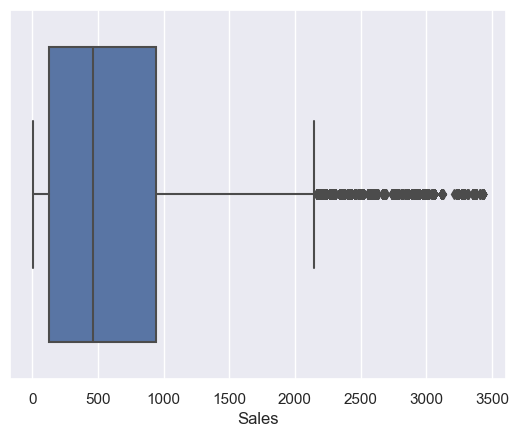

In [30]:
sns.boxplot(df['Sales'])

In [31]:
Q1=df.Sales.quantile(0.25)
Q3=df.Sales.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

127.8 939.588 811.788


In [32]:
# drop duplicates
df=df.drop_duplicates()
df.head()

,Category,Territory,Country,OrderCount,Date,Sales,Quantity,Discount
0,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,68.786592,3.0,0.0
1,Accessories,United Kingdom,United Kingdom,1.0,2012-06-30,90.000000,6.0,0.0
2,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,182.352000,3.0,0.0
3,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,317.596400,3.0,0.0
4,Clothing,United Kingdom,United Kingdom,1.0,2012-06-30,159.558000,7.0,0.0


In [33]:
df.count()

Category      29543
Territory     29580
Country       29580
OrderCount    29580
Date          29580
Sales         29580
Quantity      29580
Discount      29580
dtype: int64

In [34]:
print(df.isnull().sum())

Category      37
Territory      0
Country        0
OrderCount     0
Date           0
Sales          0
Quantity       0
Discount       0
dtype: int64


In [35]:
# drop null
df=df.dropna()
df.count()

Category      29543
Territory     29543
Country       29543
OrderCount    29543
Date          29543
Sales         29543
Quantity      29543
Discount      29543
dtype: int64

In [36]:
print(df.isnull().sum())

Category      0
Territory     0
Country       0
OrderCount    0
Date          0
Sales         0
Quantity      0
Discount      0
dtype: int64


In [37]:
# univariate analysis -> analysis of a single variable(column)

<AxesSubplot:>

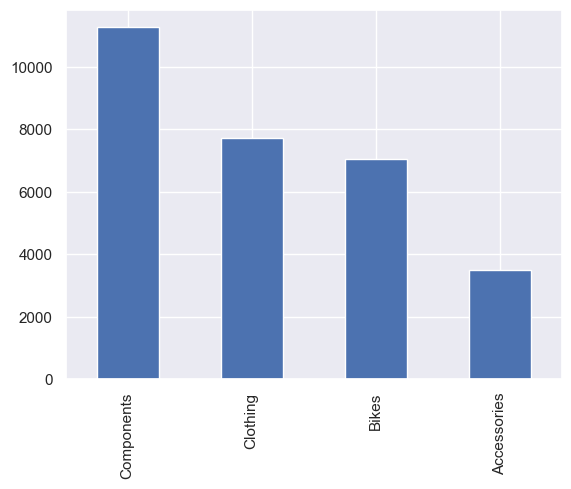

In [38]:
df.Category.value_counts().plot(kind='bar')

In [39]:
df.Category.value_counts()

Components     11268
Clothing        7733
Bikes           7048
Accessories     3494
Name: Category, dtype: int64

In [40]:
# get frequency
tab=pd.crosstab(index=df['Category'],columns=['Relative Frequency'])
print(tab)

col_0        Relative Frequency
Category                       
Accessories                3494
Bikes                      7048
Clothing                   7733
Components                11268


In [41]:
print(tab/tab.sum())

col_0        Relative Frequency
Category                       
Accessories            0.118268
Bikes                  0.238568
Clothing               0.261754
Components             0.381410


In [42]:
# Bivariate analysis

In [44]:
ct=pd.crosstab(df['Category'],df['Country'])
ct

Country,Australia,Canada,France,Germany,United Kingdom,United States
Category,,,,,,
Accessories,125,604,281,210,277,1997
Bikes,174,1025,490,291,606,4462
Clothing,211,1318,597,333,585,4689
Components,309,1898,879,387,868,6927


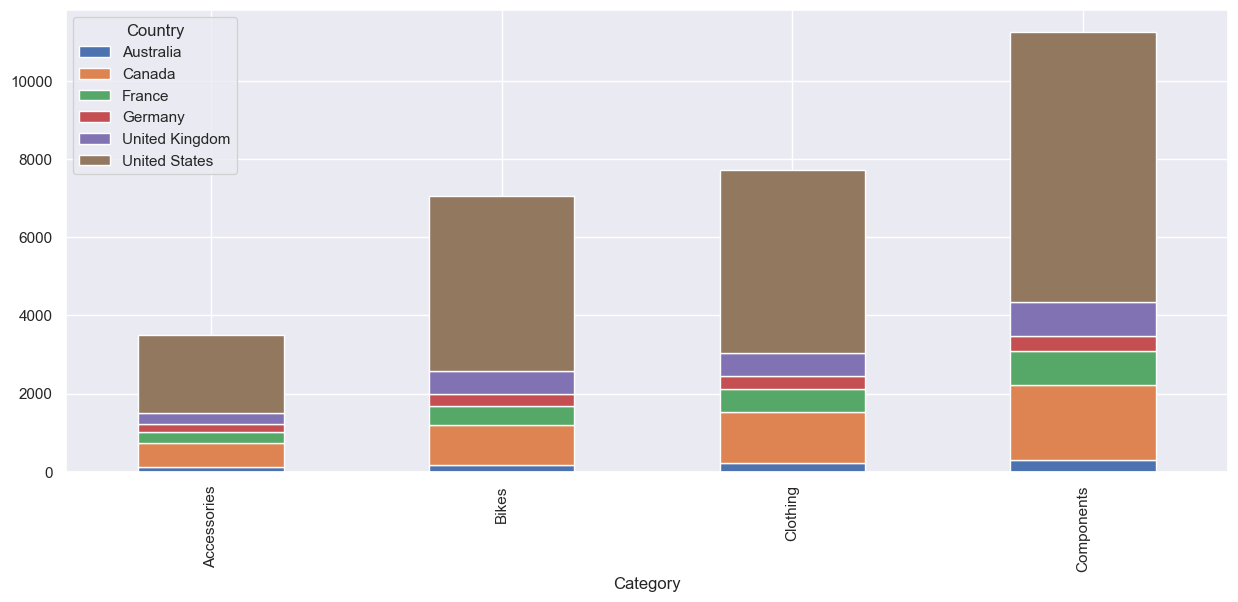

In [45]:
ct.plot.bar(stacked=True,figsize=(15,6))
plt.show()

In [46]:
stacked=ct.stack().reset_index().rename(columns={0:'value'})
stacked

,Category,Country,value
0,Accessories,Australia,125
1,Accessories,Canada,604
2,Accessories,France,281
3,Accessories,Germany,210
4,Accessories,United Kingdom,277
5,Accessories,United States,1997
6,Bikes,Australia,174
7,Bikes,Canada,1025
8,Bikes,France,490
9,Bikes,Germany,291


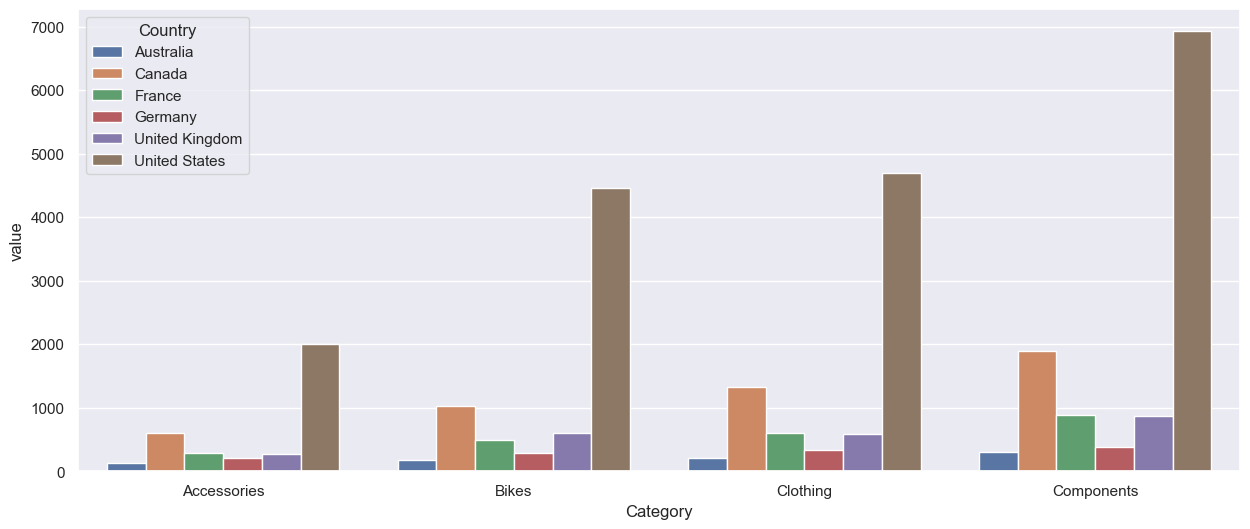

In [47]:
plt.figure(figsize=(15,6))
bi=sns.barplot(x=stacked.Category,y=stacked.value,hue=stacked.Country)

In [48]:
d_v=df.groupby(['Category','Country']).mean()[['Sales','Discount']]

<AxesSubplot:xlabel='Category,Country'>

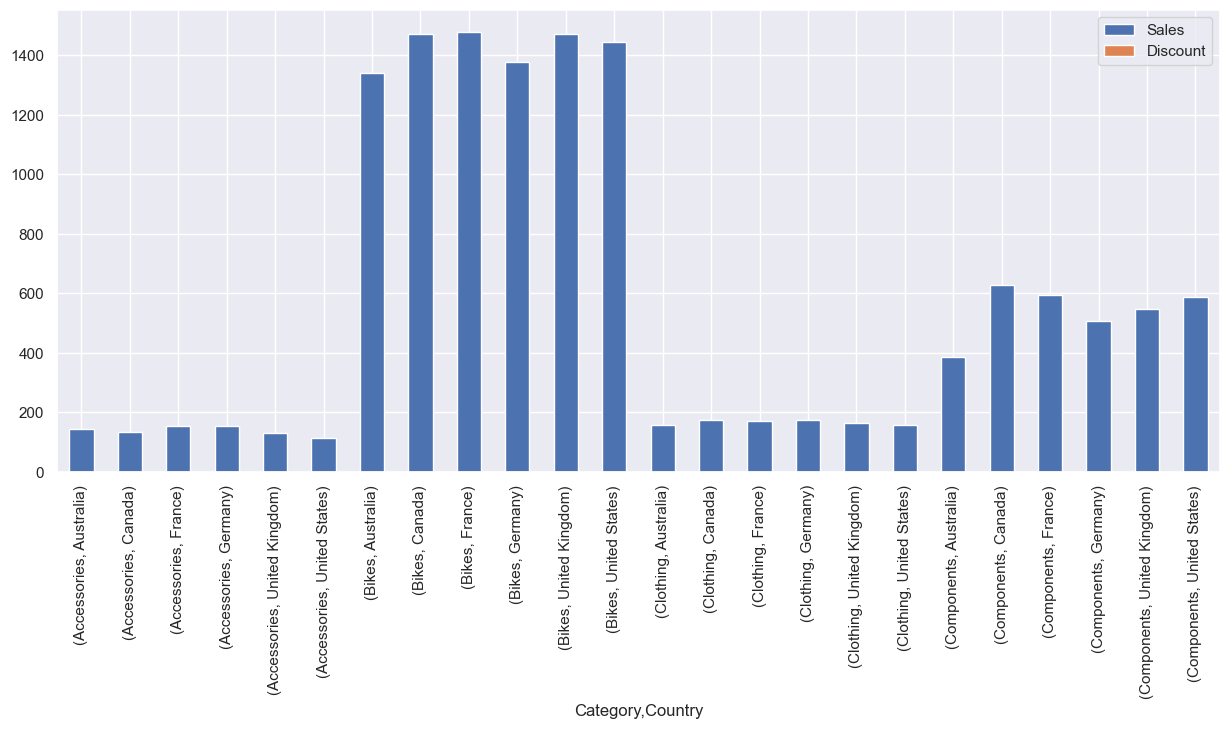

In [50]:
d_v.plot.bar(stacked=True,figsize=[15,6])

In [52]:
df=pd.read_excel('Data\AdvWorksData.xlsx')

In [53]:
bi_v=df.groupby(['productcategory','Country']).mean()[['Sales','Discount']]
d_v=bi_v[bi_v['Discount']>0]
d_v

Sales   Discount
productcategory Country                               
Accessories     Australia        137.629483   0.151658
                Canada           115.021761   1.144299
                France           148.246071   2.808140
                Germany          144.971343   2.410705
                United Kingdom   127.143367   1.752817
                United States    101.306818   1.136857
Bikes           Australia       1721.483396  36.478681
                Canada          2619.626428  17.631669
                France          3032.934961  31.698254
                Germany         2453.125037  45.826714
                United Kingdom  2566.501285  22.145484
                United States   2723.904959  17.792263
Clothing        Australia        151.645949   1.115932
                Canada           149.133267   1.603342
                France           158.726420   1.754441
                Germany          170.117421   2.479996
                United Kingdom   156.559680   1.839275
                United States    139.271975   1.707435
Components      Australia        418.175173   0.286949
                Canada           653.602219   0.519918
                France           710.814972   0.307635
                United Kingdom   647.715919   0.680438
                United States    624.451685   0.181851

<AxesSubplot:xlabel='productcategory,Country'>

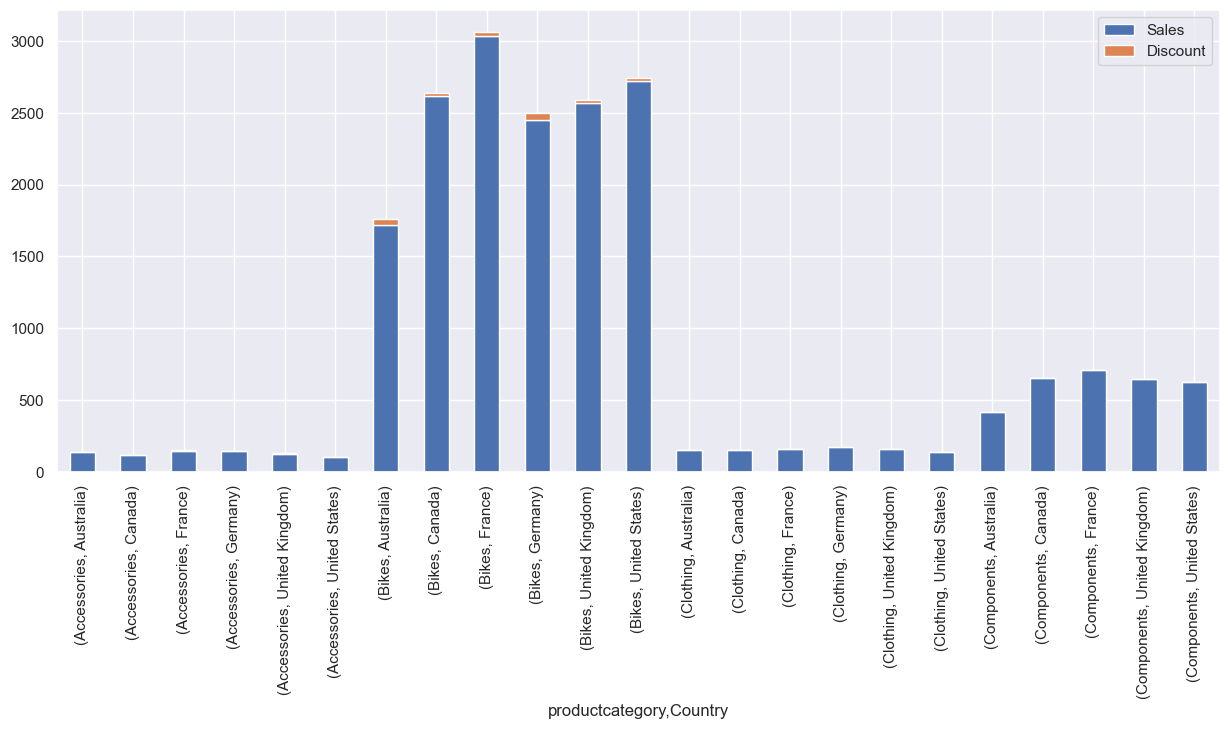

In [54]:
d_v.plot.bar(stacked=True,figsize=(15,6))

In [55]:
# relationship between sales and discount

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

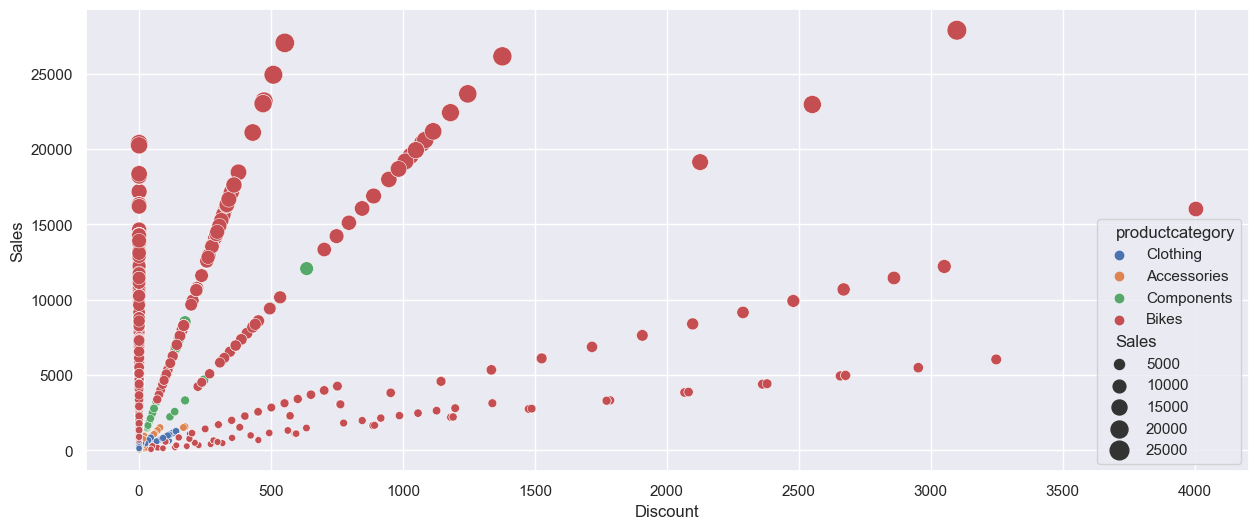

In [59]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='Discount',y='Sales',hue='productcategory',
                size='Sales',sizes=(20,200),palette='deep',legend=True)

In [60]:
df['Discount'].corr(df['Sales'])

0.17460375739090875

In [66]:
import scipy.stats

In [68]:
pearson_coef, p_value = scipy.stats.pearsonr(df["Discount"], df["Sales"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) 

Pearson Correlation Coefficient:  0.1746037573909012 and a P-value of: 0.0


In [69]:
df['UnitPrice'].corr(df['Sales'])

0.7249845048376862

<AxesSubplot:>

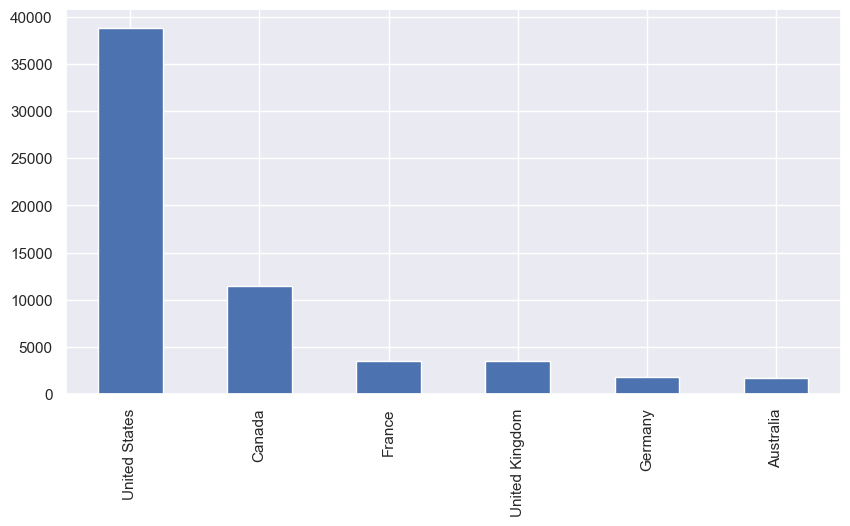

In [71]:
df.Country.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='UnitPrice', ylabel='Sales'>

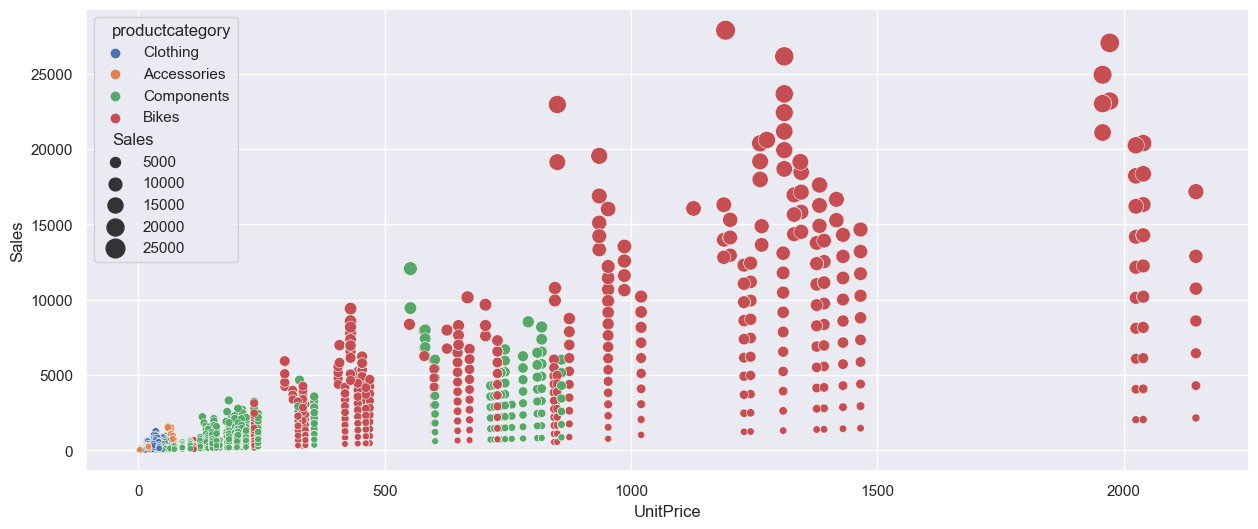

In [72]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="UnitPrice", y="Sales", hue="productcategory",size="Sales",
                sizes=(20, 200), palette="deep", legend="auto")


<AxesSubplot:xlabel='UnitPrice', ylabel='Sales'>

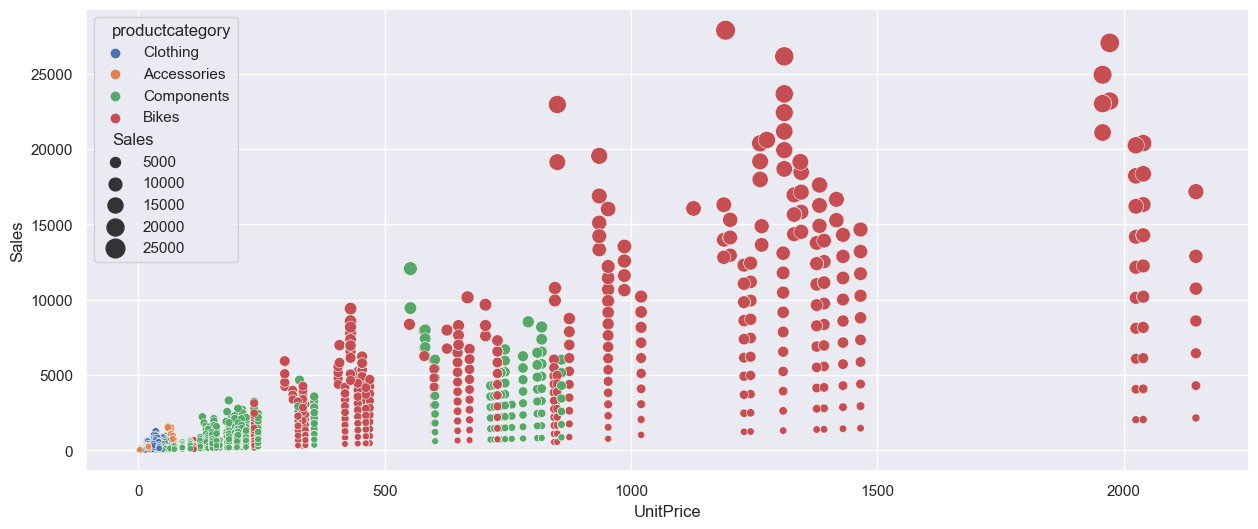

In [73]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="UnitPrice", y="Sales", hue="productcategory",size="Sales",
                sizes=(20, 200), palette="deep", legend="auto")

<AxesSubplot:xlabel='Year'>

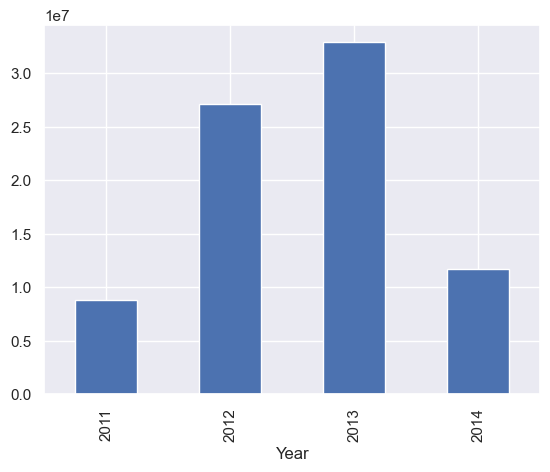

In [76]:
df['Year'] = df['OrderDate'].dt.year
df.groupby('Year')['Sales'].sum().plot(kind='bar')

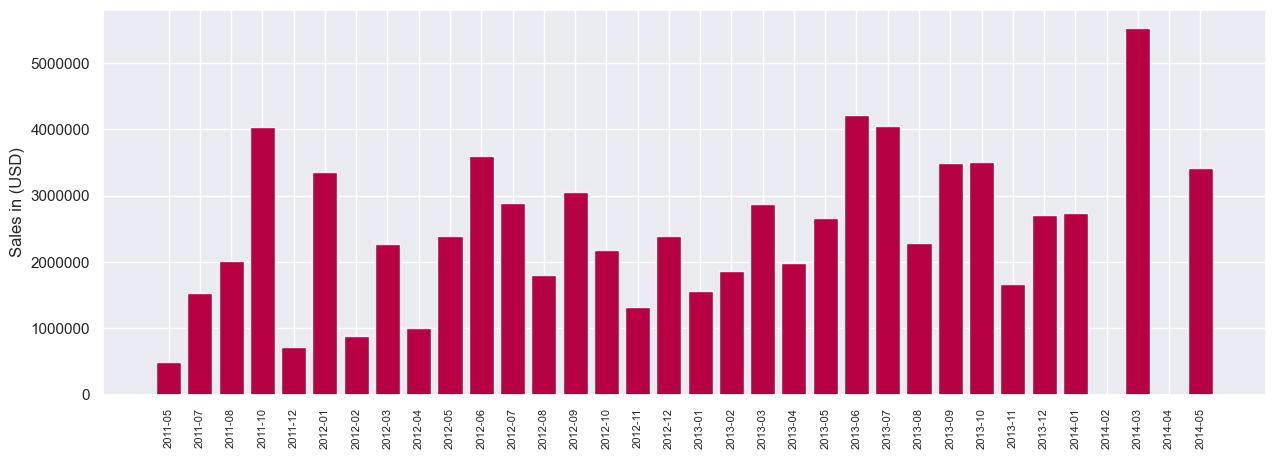

In [81]:
df['Month_Year'] = df['OrderDate'].apply(lambda x: x.strftime('%Y-%m'))
result = df.groupby('Month_Year')['Sales'].sum().reset_index()
months = [month for month, df in df.groupby('Month_Year')]
plt.figure(figsize=(15,5))
plt.ticklabel_format(style = 'plain')
plt.bar(months, result['Sales'], color= "#b80045")
plt.xticks(months, rotation='vertical', size= 8)
plt.ylabel('Sales in (USD)')
plt.show()

In [83]:
# Anamoly detection

In [89]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [91]:
yr = df[df['OrderDate'].dt.year == 2014]
yr.groupby('Month_Year')['Sales'].sum()

Month_Year
2014-01   2738752.39
2014-02      3230.65
2014-03   5526352.18
2014-04      1284.79
2014-05   3415479.07
Name: Sales, dtype: float64

In [90]:
yr11 = df[df['OrderDate'].dt.year == 2012]
yr11.groupby('Month_Year')['Sales'].sum()

Month_Year
2012-01   3356069.34
2012-02    882899.94
2012-03   2269116.71
2012-04   1001803.77
2012-05   2393689.52
2012-06   3601190.71
2012-07   2885359.20
2012-08   1802154.21
2012-09   3053816.33
2012-10   2185213.21
2012-11   1317541.83
2012-12   2384846.59
Name: Sales, dtype: float64

In [92]:
yr = df[df['OrderDate'].dt.year == 2014]
yr.groupby(['Month_Year','productcategory'])['Sales','Discount'].sum()

C:\Users\User\AppData\Local\Temp\ipykernel_14460\703292376.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yr.groupby(['Month_Year','productcategory'])['Sales','Discount'].sum()


Sales  Discount
Month_Year productcategory                     
2014-01    Accessories       19010.00      1.01
           Bikes           2431349.18   2181.21
           Clothing          54727.44    364.26
           Components       233566.99      0.00
2014-02    Accessories          41.99      0.00
           Components         2141.39      0.00
2014-03    Accessories       68273.97    600.00
           Bikes           4444823.17  18599.96
           Clothing         150378.36   2200.31
           Components       855667.14     14.73
2014-04    Accessories          41.99      0.00
           Components          713.80      0.00
2014-05    Accessories       38569.16    241.56
           Bikes           2716128.86  11709.74
           Clothing          83642.49    962.71
           Components       577138.55     25.19